In [1]:
import numpy as np
from PIL import Image
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

<font face="微软雅黑" size=5 color=#A52A2A > 读取图像

In [2]:
image_path = 'E:\原始图像.png'
image=Image.open(image_path)

In [3]:
image_np = np.array(image)   # 将图像转换为NumPy数组
h, w, c = image_np.shape        # 获取图像的尺寸
h,w,c

(430, 643, 4)

<font face="微软雅黑" size=5 color=#A52A2A > 将图像压缩,每行代表一个像素的RGB值

In [4]:
compress_image = image_np.reshape(h*w, c)
rgb_image = compress_image[:, :3] #忽略Alpha通道

In [5]:
rgb_image[:5] #显示数组

array([[190, 226, 237],
       [190, 226, 237],
       [191, 226, 237],
       [191, 226, 237],
       [191, 226, 237]], dtype=uint8)

<font face="微软雅黑" size=6 color=#A52A2A > FCM算法

In [6]:
def FCM(data, k_num, m, error, max_its):
    num = data.shape[0]
    # 初始化U矩阵
    u = np.random.random((num, k_num))
    u = np.divide(u, np.sum(u, axis=1)[:, np.newaxis])
    it = 0

    while it < max_its:
        it += 1
        um = u ** m
        # 计算聚类中心
        center = np.divide(np.dot(um.T, data), np.sum(um.T, axis=1)[:, np.newaxis])
        # 计算距离矩阵
        # 使用cdist计算所有点到所有质心的距离
        distance = cdist(data, center, 'euclidean') ** 2

        # 更新U矩阵,计算每个样本对所有聚类的隶属度
        new_u = 1. / (distance ** (2 / (m - 1)))
        new_u = new_u / np.sum(new_u, axis=1)[:, np.newaxis]

        # 检查收敛性
        if np.sum(abs(new_u - u)) < error:
            break
        u = new_u
    # 返回每个点所属的类别
    return np.argmax(u, axis=1)

<font face="微软雅黑" size=5 color=#A52A2A > 进行聚类

In [7]:
fcm_result = FCM(rgb_image, 5, 2, 1e-5, 500)
restore_image = fcm_result.reshape(h,w)

<font face="微软雅黑" size=5 color=#A52A2A > 显示图像

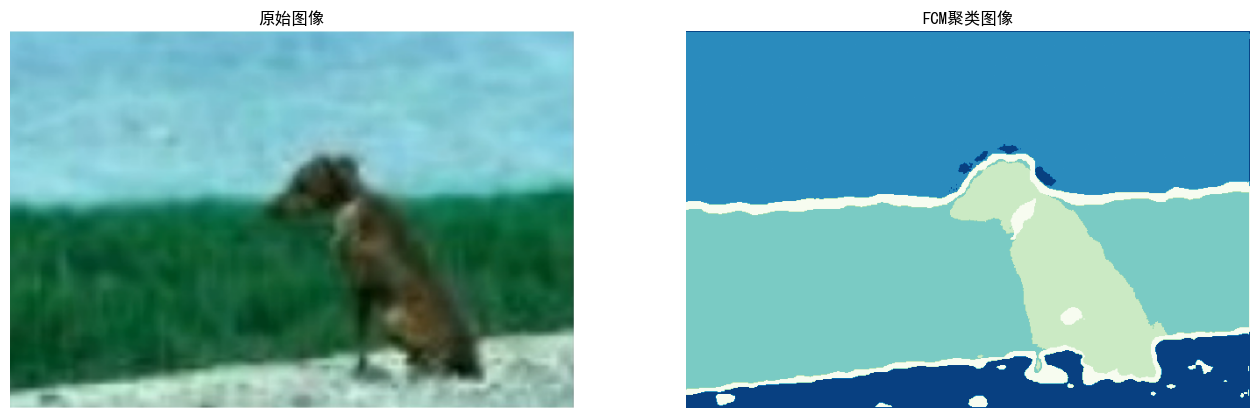

In [8]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('原始图像')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(restore_image,cmap='GnBu')
plt.title('FCM聚类图像')
plt.axis('off')
plt.show()